In [3]:
import os
os.chdir('/home/src/spacesense')
import spacesense
from glob import glob
import time
from spacesense import datasets, utils


In [1]:
aoi_geometry= '/home/src/usecase_DSTI_SL/boundaries/westarea.shp'

In [5]:
folder=glob('/home/src/usecase_DSTI_SL/S2*')[1]
folder

'/home/src/usecase_DSTI_SL/S2A_MSIL1C_20191019T111101_N0208_R137_T28PFQ_20191019T130556.SAFE'

In [10]:
ds = datasets.read_sentinel_2(folder_path=folder)

In [16]:
all_bands,data_resampled = ds.get_data(AOI=aoi_geometry,resample=True,resize_raster_source='B02')

loading data...
all 13 bands loaded
resampling data started...
B01  done
B02  done
B03  done
B04  done
B05  done
B06  done
B07  done
B08  done
B09  done
B10  done
B11  done
B12  done
B8A  done
resampled in:  3.949599504470825  seconds


In [19]:
all_bands

{'B01': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 'B02': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 'B03': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 'B04': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16),
 'B05': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0

In [21]:
data_resampled.shape

(13, 4483, 4258)

In [23]:
ds_ndvi = ds.get_ndvi(data_resampled)

/home/src/spacesense/spacesense/datasets.py:512: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (data[nir_index,:, :] - data[red_index,:, :]) / (data[nir_index,:, :] + data[red_index,:, :])


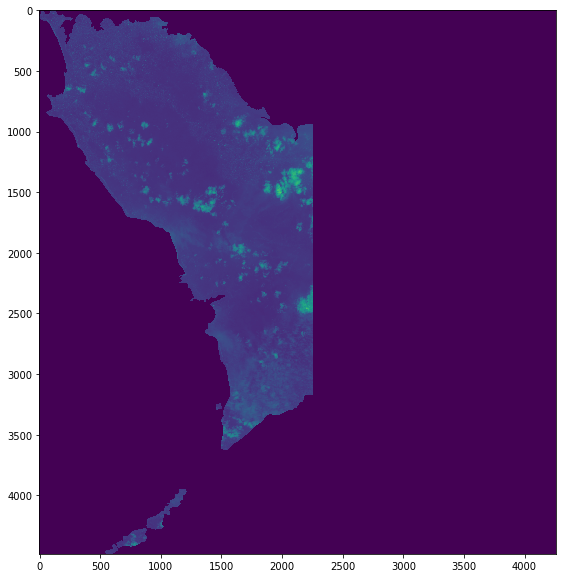

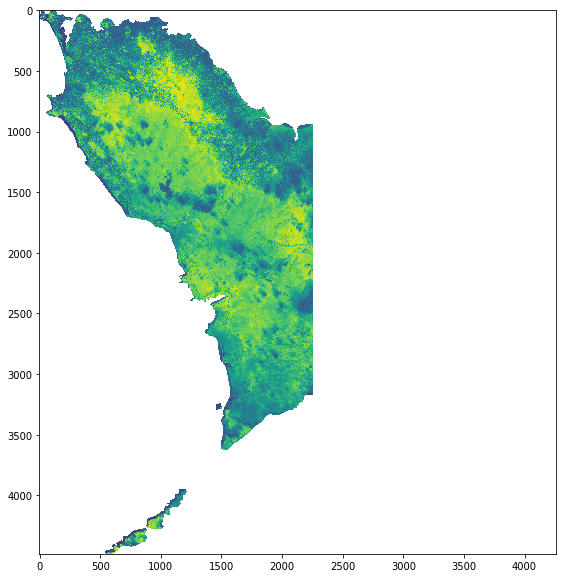

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(data_resampled[1])
plt.figure(figsize=(10,10))
plt.imshow(ds_ndvi)